<a href="https://colab.research.google.com/github/AntonioGarciaGarvi/C.-elegans-alive-dead-classification-using-deep-learning/blob/main/C_elegans_alive_dead_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Pytorch requirements and clone the github repo

In [ ]:
!pip install torch==1.7.1 torchvision==0.8.2

     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 12.8MB 242kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [ ]:
! git clone https://github.com/AntonioGarciaGarvi/C.-elegans-alive-dead-classification-using-deep-learning.git

Cloning into 'C.-elegans-alive-dead-classification-using-deep-learning'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 122 (delta 5), reused 95 (delta 1), pack-reused 0
Receiving objects: 100% (122/122), 42.68 MiB | 25.41 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# Import libraries

In [ ]:
%cd C.-elegans-alive-dead-classification-using-deep-learning/Demo_files/

/content/C.-elegans-alive-dead-classification-using-deep-learning/Demo_files


In [ ]:
from __future__ import print_function
import torch
import numpy as np
import torchvision
from torchvision import transforms
%matplotlib inline
import matplotlib.pyplot as plt
import modelsNN
import utils_demo
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models


# Load demo dataset and trained model

In [ ]:
# Using CPU or GPUs
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_dir = '/content/C.-elegans-alive-dead-classification-using-deep-learning/Demo_files/data/'
input_shape = 80 # sub-image size
seq_lenght = 3
mean = [0.1716,0.1716,0.1716]
std = [0.0334,0.0334,0.0334]

data_transforms = transforms.Compose([
        transforms.CenterCrop(input_shape),
        transforms.Resize(224),
        transforms.Grayscale(3),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)])

# Call dataset class and dataloader
data = utils_demo.RNN_Dataset(data_dir, seq_lenght, data_transforms)
data_loader =  torch.utils.data.DataLoader(data, batch_size=1, shuffle=True, num_workers=1)

In [ ]:
# Load the model and set to eval mode
model = torch.load('/content/C.-elegans-alive-dead-classification-using-deep-learning/Demo_files/resnet18lstm.pth', map_location=device)
model.eval()

CombineResnet18Lstm(
  (cnn): Resnet18Pretrained(
    (conv_model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

# Make and visualize predictions of the demo dataset

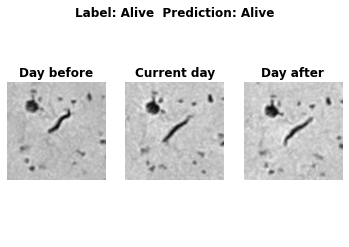

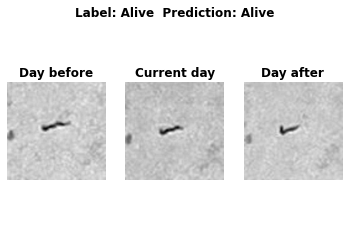

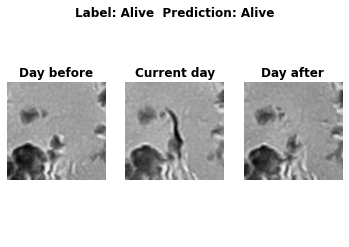

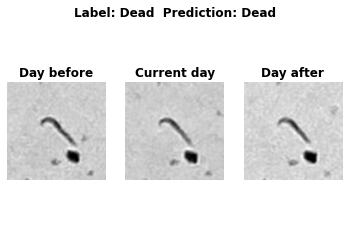

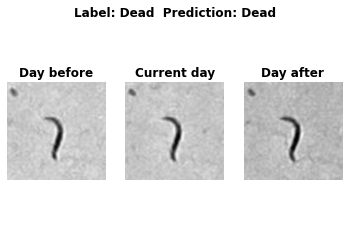

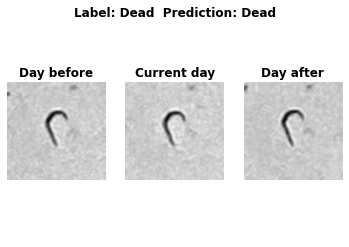

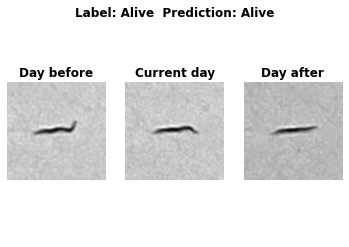

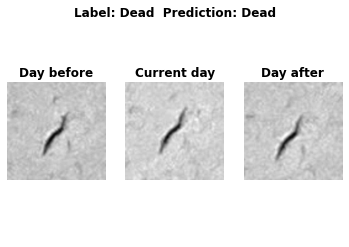

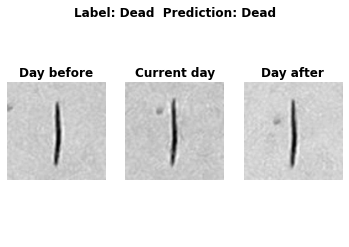

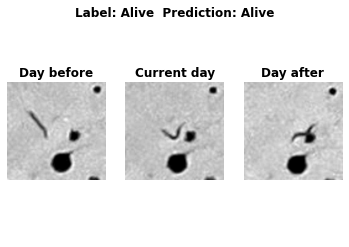

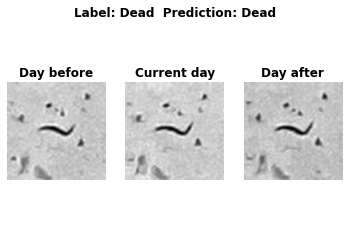

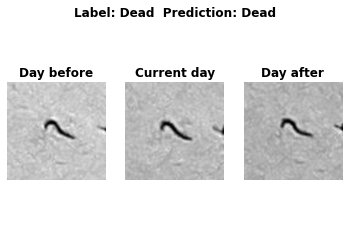

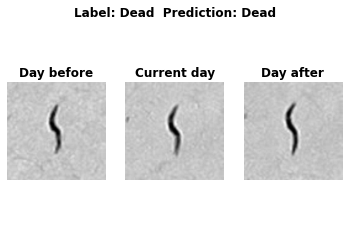

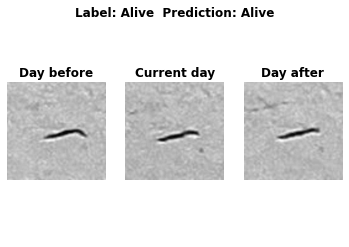

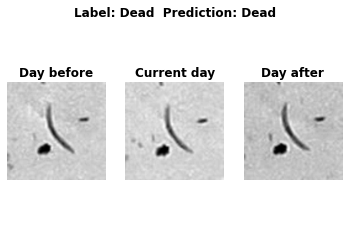

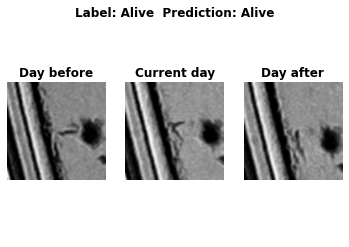

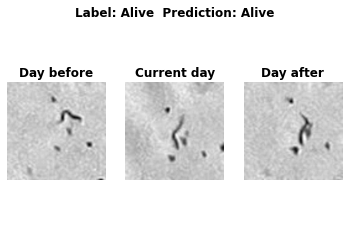

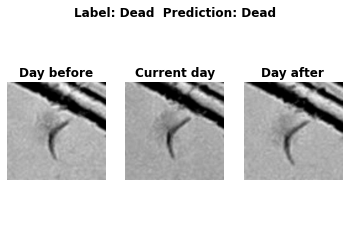

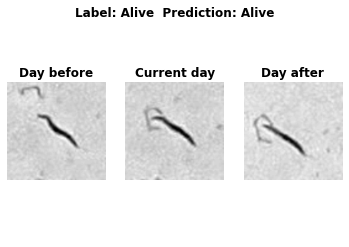

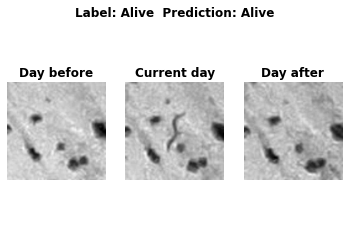

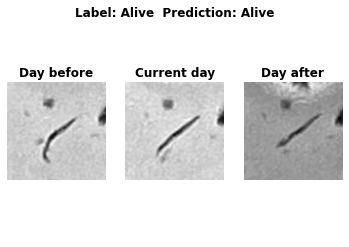

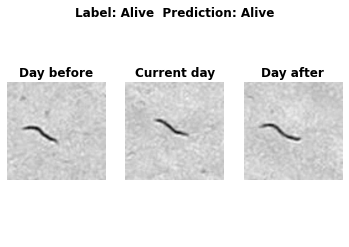

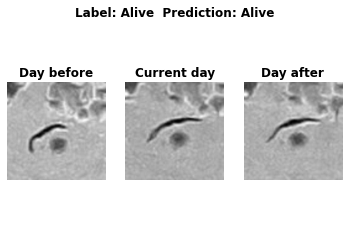

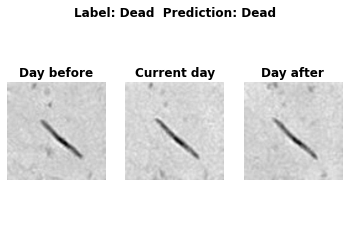

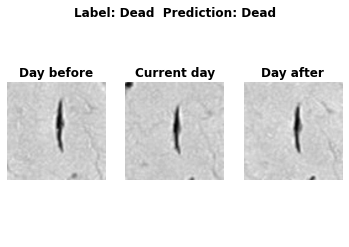

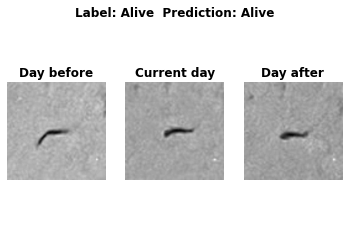

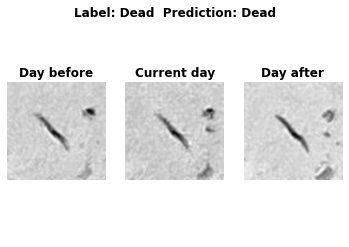

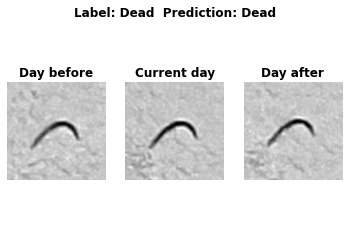

In [ ]:
with torch.no_grad():
    for i, (seq, label) in enumerate(data_loader):
        seq = seq.to(device)
        label = label.to(device)
        output = model(seq)
        _, pred = torch.max(output, 1)
        utils_demo.visualize_seq_prediction(seq, label, pred, mean_unorm=0.1716, std_unorm=0.0334)